# Gravity corrections

In this exercise, we study simple versions of terrain and Bouguer corrections to gravity measurements. The vertical component of gravitational acceleration caused by an extended body is given by the integral

\begin{equation}
g_z = -G\, \int_x \int_y \int_z \frac{\rho(x,y,z)}{r^2(x,y,z)}\,\hat{r}_z\,dx\,dy\,dz\,,
\end{equation}

where $G$ is the gravitational constant, $\rho(x,y,z)$ is the density at some location $(x,y,z)$, $r(x,y,z)$ is the distance between $(x,y,z)$ and the observation point $P$, and $\hat{r}_z$ is the vertical component of the unit vector between $(x,y,z)$ and the observation point $P$.

To numerically solve the integral, we discretize the spatial domain into evenly-spaced grid points $(x_i, y_i, z_i)$, separated by some small distance $h$. We then obtain an approximation of $g_z$ by summing over all grid points,

\begin{equation}
g_z \approx -G\,\sum_i \frac{\rho(x_i,y_i,z_i)}{r^2(x_i,y_i,z_i)}\,\hat{r}_z\,V\,,
\end{equation}

where the small volume $V$ is given by $V=h^3\approx dx\,dy\,dz$. The product $\rho(x_i,y_i,z_i) V$ equals the mass $m_i$ contained in the small volume $V$. Renaming $r_i=r(x_i,y_i,z_i)$, we may rewrite the above equation as

\begin{equation}
g_z \approx -G\,\sum_i \frac{m_i}{r_i^2}\,\hat{r}_z\,.
\end{equation}

Considering a large extended body, e.g., the whole Earth, would require us to sum over a large number of grid points, which may take a long time to compute. Thus, for convenience, we limit ourselves to a small Cartesian box for which calculations can be performed quickly.

## 0. Import Python packages and define gravitational constant

We start by importing some essential Python packages and defining the gravitational constant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67508e-11

## 1. Computational domain and density distribution

**As a first step, we set up the computational domain, and we define some density distribution.** For convenience, we limit ourselves to a 2D density distribution, meaning that we ignore the spatial extension of the body in $y$-direction.

The density distribution that we consider, mimics two mountains with densities of $\rho=3000$ kg$/$m$^3$ and $\rho=2700$ kg$/$m$^3$, respectively. Their corresponding heights are $5$ km and $8$ km. Both mountains are embedded within a homogeneous crust of density $\rho=3500$ kg$/$m$^3$, which reaches a constant altitude of $3$ km. This is intended to simulate a high plateau.

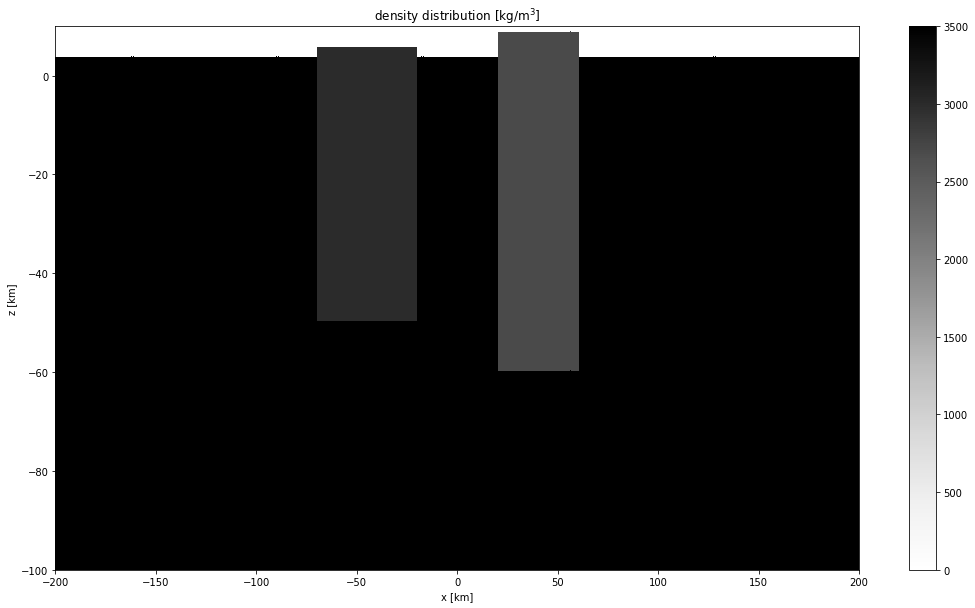

In [20]:
# Dimension of the computational domain [m].
x_min=-200.0e3
x_max=200.0e3
z_min=-100.0e3
z_max=10.0e3

# Grid spacing [m] and cell volume.
h=1.0e3
V=h**3

nx=np.int((x_max-x_min)/h)
nz=np.int((z_max-z_min)/h)

# Coordinate axes.
x=np.linspace(x_min,x_max,nx)
z=np.linspace(z_min,z_max,nz)

xv,zv=np.meshgrid(x,z,indexing='ij')

# Define some density distribution.
rho=np.zeros(np.shape(xv)) # To initialize, set all densities to zero.
rho[:,0:103]=3500.0 # Set density below the surface of the Earth.
rho[130:180,50:105]=3000.0 # A mountain with lower density.
rho[220:260,40:108]=2700.0 # Another mountain with even lower density.

# Plot density distribution.
fig=plt.figure(figsize=(18, 10))
plt.pcolor(xv/1000.0,zv/1000.0,rho,cmap='Greys')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'density distribution [kg$/$m$^3$]')
plt.colorbar()
plt.show()

## 2. Gravitational acceleration

**Based on the setup above, we can compute the gravitational acceleration at some observation points.** For this, we initially choose a line of closely spaced points located $12$ km above the surface.

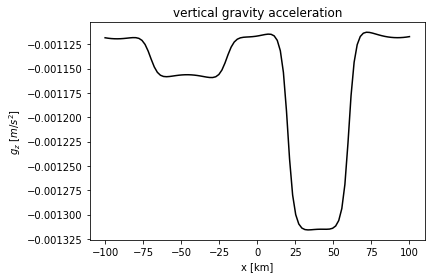

In [22]:
# Define observation points.
x_obs=np.linspace(-100.0e3,100.0e3,100)
z_obs=12.0e3*np.ones(nx)

# Initialize gravitational potential.
gz=np.zeros(len(x_obs))

# Loop over all observation points.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2) # distance to observation point
    rz=(z_obs[k]-zv)/r # z-component of unit vector to observation point
    gz[k]=-G*V*np.sum(rz*rho/r**2) # sum over all masses
            
# Plot gravitational potential.
plt.plot(x_obs/1000.0,gz,'k')
plt.xlabel('x [km]')
plt.ylabel(r'$g_z$ [$m$/$s^2$]')
plt.title('vertical gravity acceleration')
plt.show()

## 3. Terrain correction

**To extract the gravity signal of the mountain roots, we first perform a simple terrain correction.** We do this by computing separately the vertical gravitational acceleration of the two mountains above the high plateau, i.e., the parts of the mountains above $3$ km altitude. Subsequently, we subtract this acceleration from the total acceleration computed before.

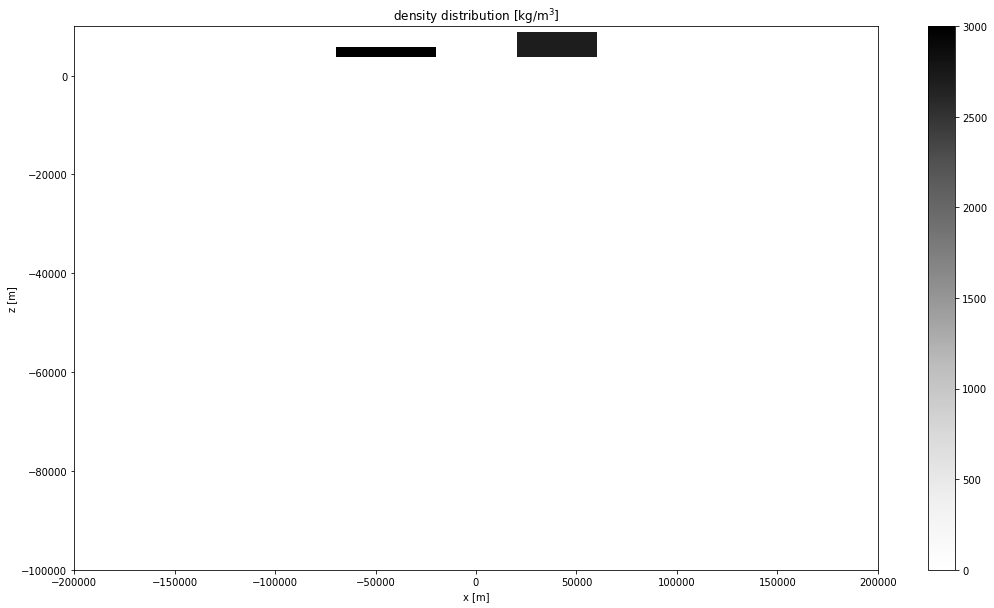

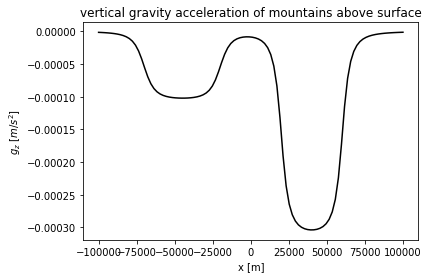

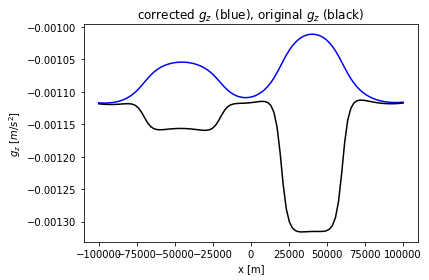

In [24]:
# Density distribution of the mountains above the high plateau.
rho_mountain=np.zeros(np.shape(xv)) # To initialize, set all densities to zero.
rho_mountain[130:180,103:105]=3000.0 # A mountain with lower density.
rho_mountain[220:260,103:108]=2700.0 # Another mountain with even lower density.

# Plot density distribution.
fig=plt.figure(figsize=(18, 10))
plt.pcolor(xv,zv,rho_mountain,cmap='Greys')
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.title(r'density distribution [kg$/$m$^3$]')
plt.colorbar()
plt.show()

# Initialize gravitational potential.
gz_mountain=np.zeros(len(x_obs))

# Loop over all observation points.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2) # distance to observation point
    rz=(z_obs[k]-zv)/r # z-component of unit vector to observation point
    gz_mountain[k]=-G*V*np.sum(rz*rho_mountain/r**2) # sum over all masses
            
# Plot vertical gravitational acceleration of the mountains.
plt.plot(x_obs,gz_mountain,'k')
plt.xlabel('x [m]')
plt.ylabel(r'$g_z$ [$m$/$s^2$]')
plt.title('vertical gravity acceleration of mountains above surface')
plt.show()

# Plot terrain-corrected gravitational acceleration.
plt.plot(x_obs,gz-gz_mountain,'b')
plt.plot(x_obs,gz,'k')
plt.xlabel('x [m]')
plt.ylabel(r'$g_z$ [$m$/$s^2$]')
plt.title(r'corrected $g_z$ (blue), original $g_z$ (black)')
plt.show()

## 4. Exercises

1) Following the example from point 3, apply a Bouguer correction to the total vertical gravity measurement.

2) The two mountains are not isostatically compensated. Compute the densities of the mountains, assuming the same geometry (depth of the mountain root and height) and isostatic equilibrium.

3) Repeat the calculation of the total gravity acceleration and of the terrain and Bourguer corrections for the densities computed in exercise 2.

4) **Optional:** Extend the above calculations to include the horizontal components of gravitational acceleration.